# Data Analysis Notebook

In [226]:
import pandas as pd
import geopandas as gpd

## Import Data

### State Data

In [227]:
path_to_csv = "Election_Data_2018/HOUSE2018_precinct_PA.csv"
headers = [ "precinct" , "office" , "party_detailed" , "party_simplified" , "mode" , "votes" , "county_name" , "county_fips" , "jurisdiction_name" , "jurisdiction_fips" , "candidate" , "district" , "magnitude" , "dataverse" , "year" , "stage" , "state" , "special" , "writein" , "state_po" , "state_fips" , "state_cen" , "state_ic" , "date" , "readme_check" ]

data = pd.read_csv(path_to_csv, header=None, names=headers)
data["county_name"] = data["county_name"].str.title() + " County"

data.head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check
0,1000_001010140_1000,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,398,Bucks County,42017,FALLS,42017,...,GEN,PENNSYLVANIA,False,False,PA,42,23,14,2018-11-06,False
1,1000_001010140_1000,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,415,Bucks County,42017,FALLS,42017,...,GEN,PENNSYLVANIA,False,False,PA,42,23,14,2018-11-06,False
2,1000_001012053_1012,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,492,Montgomery County,42091,HATFIELD,42091,...,GEN,PENNSYLVANIA,False,False,PA,42,23,14,2018-11-06,False
3,1000_001012053_1012,US HOUSE,REPUBLICAN,REPUBLICAN,TOTAL,409,Montgomery County,42091,HATFIELD,42091,...,GEN,PENNSYLVANIA,False,False,PA,42,23,14,2018-11-06,False
4,1005_001012053_1016,US HOUSE,DEMOCRAT,DEMOCRAT,TOTAL,522,Montgomery County,42091,HATFIELD,42091,...,GEN,PENNSYLVANIA,False,False,PA,42,23,14,2018-11-06,False


### Geopandas map

In [228]:
gdf = gpd.read_file("tlgdb_a_42_pa_County_2020.zip")
gdf.head()

,COUNTYNS,GEOID,NAMELSAD,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01214112,42007,Beaver County,H1,A,1.125855e+09,24162295.0,+40.6841401,-80.3507209,"POLYGON ((-80.51896 40.73374, -80.51896 40.734..."
1,01213669,42053,Forest County,H1,A,1.106596e+09,8369675.0,+41.5133040,-79.2497050,"POLYGON ((-79.20499 41.62641, -79.20129 41.626..."
2,01209189,42117,Tioga County,H1,A,2.936541e+09,8279675.0,+41.7668593,-77.2572881,"POLYGON ((-77.43967 42.00012, -77.43758 42.000..."
3,01213667,42043,Dauphin County,H1,A,1.359407e+09,86209037.0,+40.4125646,-76.7926343,"POLYGON ((-76.98439 40.51457, -76.98441 40.514..."
4,01213692,42127,Wayne County,H1,A,1.879734e+09,64785676.0,+41.6466021,-75.2924932,"POLYGON ((-75.45976 41.59504, -75.45980 41.595..."


In [229]:
data = gdf.set_index('NAMELSAD').join(data.set_index('county_name'))
data['County'] = data.index
data.head()

,COUNTYNS,GEOID,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,precinct,...,state,special,writein,state_po,state_fips,state_cen,state_ic,date,readme_check,County
Adams County,01213656,42001,H1,A,1.343401e+09,7771555.0,+39.8694707,-77.2177296,"POLYGON ((-77.22887 40.02508, -77.22873 40.025...",100_013033091_0100,...,PENNSYLVANIA,False,False,PA,42.0,23.0,14.0,2018-11-06,False,Adams County
Adams County,01213656,42001,H1,A,1.343401e+09,7771555.0,+39.8694707,-77.2177296,"POLYGON ((-77.22887 40.02508, -77.22873 40.025...",100_013033091_0100,...,PENNSYLVANIA,False,False,PA,42.0,23.0,14.0,2018-11-06,False,Adams County
Adams County,01213656,42001,H1,A,1.343401e+09,7771555.0,+39.8694707,-77.2177296,"POLYGON ((-77.22887 40.02508, -77.22873 40.025...",10_013033193_0010,...,PENNSYLVANIA,False,False,PA,42.0,23.0,14.0,2018-11-06,False,Adams County
Adams County,01213656,42001,H1,A,1.343401e+09,7771555.0,+39.8694707,-77.2177296,"POLYGON ((-77.22887 40.02508, -77.22873 40.025...",10_013033193_0010,...,PENNSYLVANIA,False,False,PA,42.0,23.0,14.0,2018-11-06,False,Adams County
Adams County,01213656,42001,H1,A,1.343401e+09,7771555.0,+39.8694707,-77.2177296,"POLYGON ((-77.22887 40.02508, -77.22873 40.025...",110_013033091_0110,...,PENNSYLVANIA,False,False,PA,42.0,23.0,14.0,2018-11-06,False,Adams County


## Actual Data analysis

In [230]:
dem = data[data['party_simplified'] == 'DEMOCRAT']
dem_votes = (dem.groupby('County')['votes'].sum()).to_frame()
dem_votes['County'] = dem_votes.index
dem_votes = gdf.set_index('NAMELSAD').join(dem_votes.set_index('County'))
dem_votes['County'] = dem_votes.index
dem_votes.head()

,COUNTYNS,GEOID,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,votes,County
NAMELSAD,,,,,,,,,,,
Beaver County,01214112,42007,H1,A,1.125855e+09,24162295.0,+40.6841401,-80.3507209,"POLYGON ((-80.51896 40.73374, -80.51896 40.734...",32821.0,Beaver County
Forest County,01213669,42053,H1,A,1.106596e+09,8369675.0,+41.5133040,-79.2497050,"POLYGON ((-79.20499 41.62641, -79.20129 41.626...",564.0,Forest County
Tioga County,01209189,42117,H1,A,2.936541e+09,8279675.0,+41.7668593,-77.2572881,"POLYGON ((-77.43967 42.00012, -77.43758 42.000...",3733.0,Tioga County
Dauphin County,01213667,42043,H1,A,1.359407e+09,86209037.0,+40.4125646,-76.7926343,"POLYGON ((-76.98439 40.51457, -76.98441 40.514...",58605.0,Dauphin County
Wayne County,01213692,42127,H1,A,1.879734e+09,64785676.0,+41.6466021,-75.2924932,"POLYGON ((-75.45976 41.59504, -75.45980 41.595...",7550.0,Wayne County


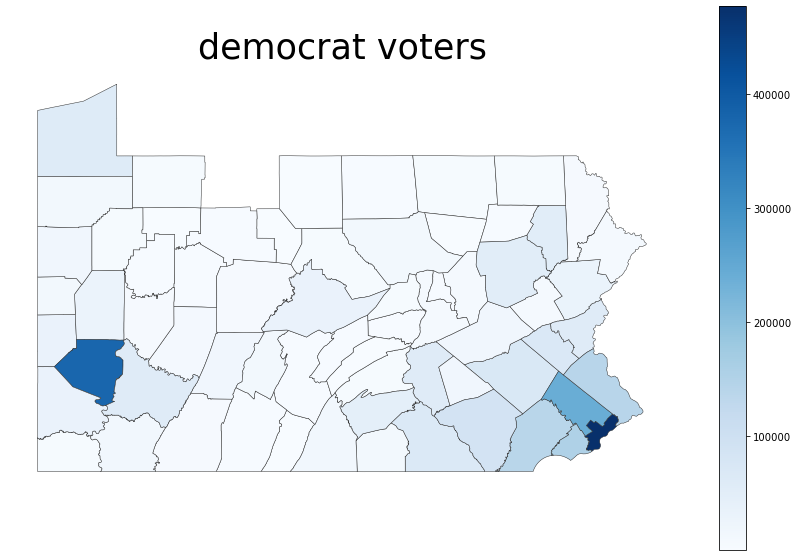

In [231]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize=(15, 10))

ax.axis('off')
ax.set_title('democrat voters', fontdict={'fontsize': '35', 'fontweight' : '3'})
dem_votes.plot(column='votes', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((1, 0.7, 0.2, 0.2))
plt.show()

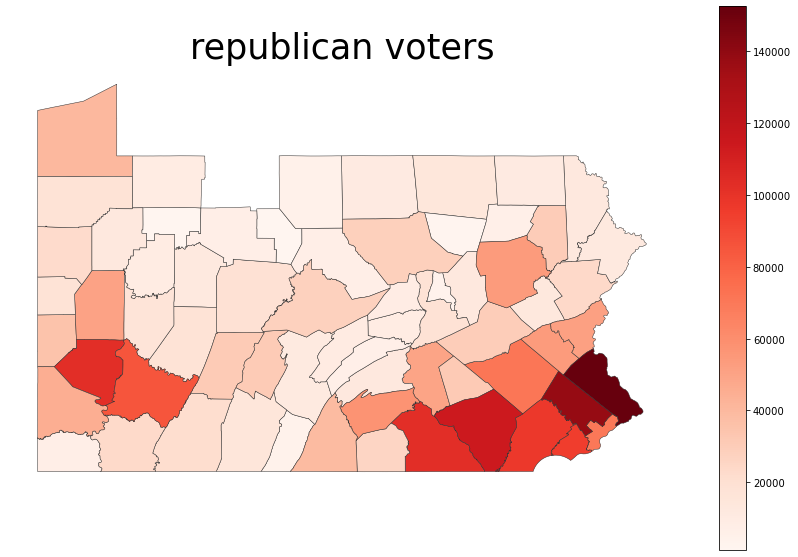

In [232]:
dem = data[data['party_simplified'] == 'REPUBLICAN']
repub_votes = (dem.groupby('County')['votes'].sum()).to_frame()
repub_votes['County'] = repub_votes.index
repub_votes = gdf.set_index('NAMELSAD').join(repub_votes.set_index('County'))
repub_votes['County'] = repub_votes.index

fig, ax = plt.subplots(1,figsize=(15, 10))

ax.axis('off')
ax.set_title('republican voters', fontdict={'fontsize': '35', 'fontweight' : '3'})
repub_votes.plot(column='votes', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((1, 0.7, 0.2, 0.2))
plt.show()